# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

> Indented block

<!-- 
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 958 kB 5.0 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 47.3 MB 1.2 MB/s            
     |████████████████████████████████| 8.6 MB 43.0 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=e5b2813ecbfabddc721549aeec5e9b593f478fe744d8b6ac2ecbd8bfd4e429f1
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you ha

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pooja2610"
kaggle_key = "*****"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=['datetime'])
import pandas as pd


train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
import pandas as pd
test = pd.read_csv('test.csv',parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train=train.drop(['casual','registered'],axis=1)


In [ ]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error",
learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
time_limit=600, 
presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220112_033754/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220112_033754/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12717.81 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of avail

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	41.31s	 = Training   runtime
	2.51s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 349.81s of the 549.82s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.2s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 335.5s of the 535.51s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	8.17s	 = Training   runtime
	

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.911420       7.715127  504.400939                0.000778           0.368384            3       True         19
1   NeuralNetFastAI_BAG_L2 -115.477193       6.840571  478.561332                0.360873         100.577161            2       True         17
2        LightGBMXT_BAG_L2 -116.216352       6.716219  388.316933                0.236521          10.332762            2       True         12
3          CatBoost_BAG_L2 -116.631160       6.519081  409.635045                0.039382          31.650874            2       True         15
4          LightGBM_BAG_L2 -117.075390       6.574875  385.657235                0.095177           7.673064            2       True         13
5     ExtraTreesMSE_BAG_L2 -117.663464       7.021778  385.449568         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.911420  ...       True         19
 1   NeuralNetFastAI_BAG_L2 -115.477193  ...       True         17
 2        LightGBMXT_BAG_L2 -116.216352  ...       True         12
 3          CatBoost_BAG_L2 -116.631160  ...       True         15
 4          LightGBM_BAG_L2 -117.075390  ...       True         13
 5     ExtraTreesMSE_BAG_L2 -117.663464  ...       True         16
 6           XGBoost_BAG_L2 -117.697474  ...       True         18
 7      WeightedEnsemble_L2 -118.429495  ...       True         11
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.592903  ...       True         14
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          9
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0     94.789864
1     86.256699
2     86.263023
3    103.286255
4    103.231247
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.756866
std       128.411316
min       -18.892422
25%       107.240738
50%       195.872284
75%       298.044586
max       659.116211
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
count=0
for i in predictions:
  if i<0:
    count=count+1
print(count)

3


In [ ]:

# Set them to zero
predictions[predictions<0] = 0
        


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 199kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-01-12 03:50:50  first raw submission               complete  1.39482      1.39482       
submission_new_hpo.csv       2022-01-11 11:58:28  new features with hyperparameters  complete  1.76365      1.76365       
submission_new_features.csv  2022-01-11 11:35:50  new features                       complete  1.77415      1.77415       


#### Initial score of 1.39

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f421dfb4190>,
      dtype=object)

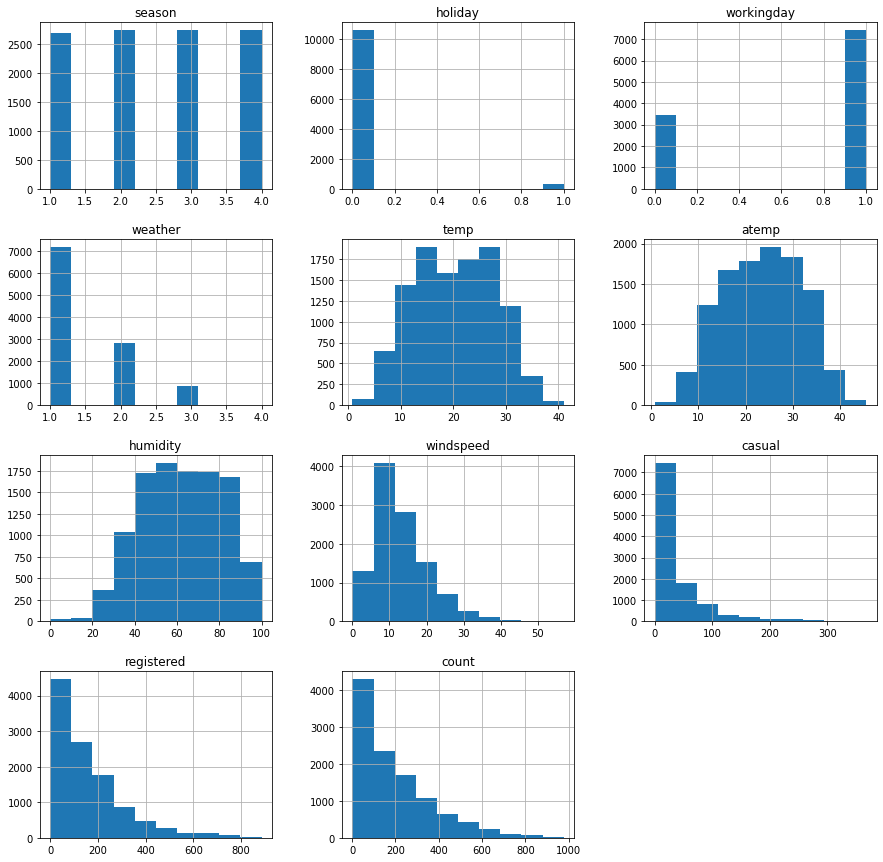

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [ ]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")


In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f421fc74610>,
      dtype=object)

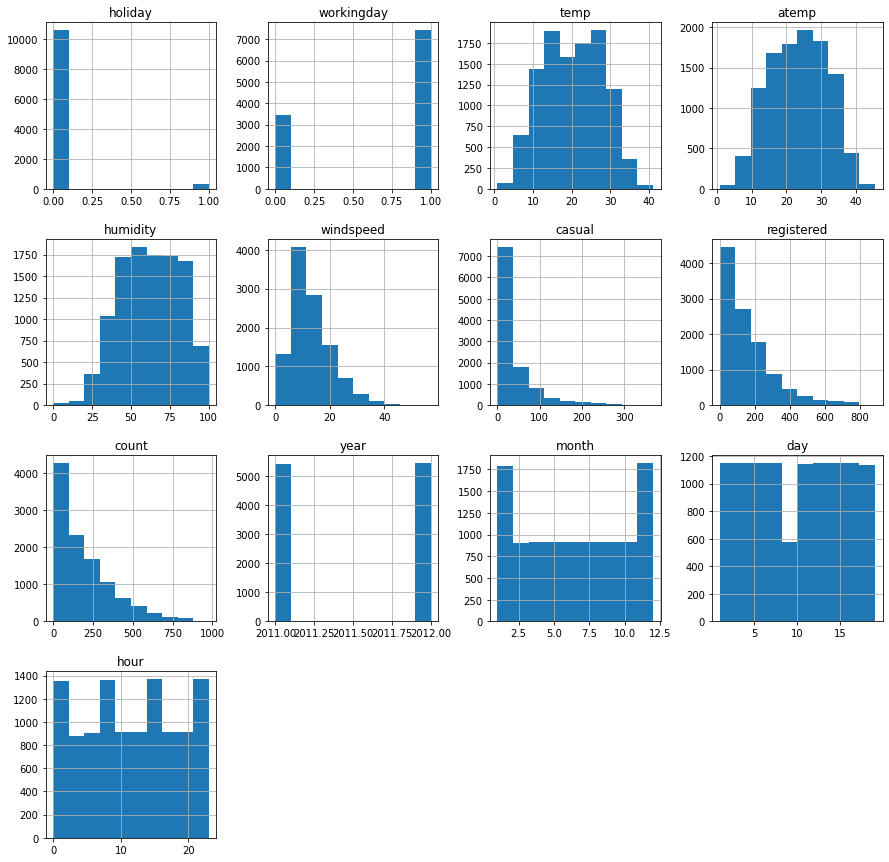

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count",problem_type = "regression", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": 
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220112_035225/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220112_035225/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12246.4 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

[1000]	train_set's rmse: 30.8186	valid_set's rmse: 38.4291
[2000]	train_set's rmse: 25.4239	valid_set's rmse: 36.1393
[3000]	train_set's rmse: 22.5686	valid_set's rmse: 35.6903
[4000]	train_set's rmse: 20.5877	valid_set's rmse: 35.5711
[5000]	train_set's rmse: 19.0435	valid_set's rmse: 35.5486


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3019	valid_set's rmse: 41.0917
[2000]	train_set's rmse: 25.4089	valid_set's rmse: 38.7923
[3000]	train_set's rmse: 22.682	valid_set's rmse: 38.0445
[4000]	train_set's rmse: 20.7477	valid_set's rmse: 37.6701
[5000]	train_set's rmse: 19.2301	valid_set's rmse: 37.5143
[6000]	train_set's rmse: 18.0161	valid_set's rmse: 37.3559
[7000]	train_set's rmse: 16.9715	valid_set's rmse: 37.2906
[8000]	train_set's rmse: 16.0611	valid_set's rmse: 37.2206
[9000]	train_set's rmse: 15.2683	valid_set's rmse: 37.1952
[10000]	train_set's rmse: 14.5678	valid_set's rmse: 37.1924


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8968	valid_set's rmse: 35.5721
[2000]	train_set's rmse: 25.8631	valid_set's rmse: 34.288
[3000]	train_set's rmse: 23.0637	valid_set's rmse: 34.1613


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.1963	valid_set's rmse: 41.0073
[2000]	train_set's rmse: 25.1657	valid_set's rmse: 39.5208
[3000]	train_set's rmse: 22.4714	valid_set's rmse: 38.891
[4000]	train_set's rmse: 20.6602	valid_set's rmse: 38.6141
[5000]	train_set's rmse: 19.2024	valid_set's rmse: 38.3924
[6000]	train_set's rmse: 18.0244	valid_set's rmse: 38.232
[7000]	train_set's rmse: 16.9892	valid_set's rmse: 38.0679
[8000]	train_set's rmse: 16.0734	valid_set's rmse: 37.9926
[9000]	train_set's rmse: 15.292	valid_set's rmse: 37.9346
[10000]	train_set's rmse: 14.5874	valid_set's rmse: 37.8583


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7161	valid_set's rmse: 38.2675
[2000]	train_set's rmse: 25.5034	valid_set's rmse: 36.7964
[3000]	train_set's rmse: 22.7183	valid_set's rmse: 36.6083


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3783	valid_set's rmse: 42.1922
[2000]	train_set's rmse: 25.4027	valid_set's rmse: 40.825
[3000]	train_set's rmse: 22.6044	valid_set's rmse: 40.6565
[4000]	train_set's rmse: 20.6399	valid_set's rmse: 40.551


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6785	valid_set's rmse: 38.6888
[2000]	train_set's rmse: 25.6628	valid_set's rmse: 35.913
[3000]	train_set's rmse: 22.8607	valid_set's rmse: 35.0407
[4000]	train_set's rmse: 20.8954	valid_set's rmse: 34.7444
[5000]	train_set's rmse: 19.3693	valid_set's rmse: 34.6106
[6000]	train_set's rmse: 18.0937	valid_set's rmse: 34.5086
[7000]	train_set's rmse: 17.0039	valid_set's rmse: 34.5219


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7847	valid_set's rmse: 40.0936
[2000]	train_set's rmse: 25.4609	valid_set's rmse: 38.335
[3000]	train_set's rmse: 22.6799	valid_set's rmse: 37.7931
[4000]	train_set's rmse: 20.8023	valid_set's rmse: 37.6372
[5000]	train_set's rmse: 19.2946	valid_set's rmse: 37.4755
[6000]	train_set's rmse: 18.0187	valid_set's rmse: 37.3536
[7000]	train_set's rmse: 16.9566	valid_set's rmse: 37.3147
[8000]	train_set's rmse: 16.0353	valid_set's rmse: 37.2951
[9000]	train_set's rmse: 15.2295	valid_set's rmse: 37.2903
[10000]	train_set's rmse: 14.5042	valid_set's rmse: 37.3442


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.2598	valid_set's rmse: 40.7273
[2000]	train_set's rmse: 25.2682	valid_set's rmse: 39.8782
[3000]	train_set's rmse: 22.5407	valid_set's rmse: 39.8429


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0398	valid_set's rmse: 37.6854
[2000]	train_set's rmse: 25.8317	valid_set's rmse: 35.4668
[3000]	train_set's rmse: 23.0887	valid_set's rmse: 34.8136
[4000]	train_set's rmse: 21.1229	valid_set's rmse: 34.5371
[5000]	train_set's rmse: 19.5767	valid_set's rmse: 34.3685
[6000]	train_set's rmse: 18.3516	valid_set's rmse: 34.2276
[7000]	train_set's rmse: 17.2755	valid_set's rmse: 34.2726


	-36.8251	 = Validation score   (root_mean_squared_error)
	87.85s	 = Training   runtime
	6.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 293.69s of the 493.7s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.556
[2000]	train_set's rmse: 15.5229	valid_set's rmse: 35.4489


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9388
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1223
[3000]	train_set's rmse: 12.2068	valid_set's rmse: 35.9677
[4000]	train_set's rmse: 9.97753	valid_set's rmse: 35.9639


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4253	valid_set's rmse: 33.0295


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.0987
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1129
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7212
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6786


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.43	valid_set's rmse: 37.371
[2000]	train_set's rmse: 15.5136	valid_set's rmse: 36.986


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9541


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0051	valid_set's rmse: 35.6024
[2000]	train_set's rmse: 15.4015	valid_set's rmse: 34.9824


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3245
[2000]	train_set's rmse: 15.6834	valid_set's rmse: 35.8282
[3000]	train_set's rmse: 12.2992	valid_set's rmse: 35.5694
[4000]	train_set's rmse: 10.1773	valid_set's rmse: 35.5318


	-36.5863	 = Validation score   (root_mean_squared_error)
	33.58s	 = Training   runtime
	1.68s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 254.4s of the 454.41s of remaining time.
	-41.3243	 = Validation score   (root_mean_squared_error)
	11.46s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 241.42s of the 441.42s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 214.07s of the 414.08s of remaining time.
	-41.0311	 = Validation score   (root_mean_squared_error)
	4.64s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 207.91s of the 407.92s of remaining time.
	-45.7812	 = Validation score   (root_mean_squared_error)
	159.49s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up 

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.109906      11.758107  521.448766                0.000850           0.379498            3       True         17
1      WeightedEnsemble_L2  -35.160148       9.025971  325.925149                0.000801           0.393811            2       True          9
2          CatBoost_BAG_L2  -35.345237       9.980012  373.880179                0.071771          43.649477            2       True         13
3     ExtraTreesMSE_BAG_L2  -35.611511      10.477221  338.495229                0.568979           8.264528            2       True         14
4          LightGBM_BAG_L2  -35.629345      10.046909  338.022881                0.138667           7.792180            2       True         11
5   RandomForestMSE_BAG_L2  -36.062815      10.466367  360.851953         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -35.109906  ...       True         17
 1      WeightedEnsemble_L2  -35.160148  ...       True          9
 2          CatBoost_BAG_L2  -35.345237  ...       True         13
 3     ExtraTreesMSE_BAG_L2  -35.611511  ...       True         14
 4          LightGBM_BAG_L2  -35.629345  ...       True         11
 5   RandomForestMSE_BAG_L2  -36.062815  ...       True         12
 6   NeuralNetFastAI_BAG_L2  -36.125896  ...       True         15
 7        LightGBMXT_BAG_L2  -36.145029  ...       True         10
 8          LightGBM_BAG_L1  -36.586278  ...       True          4
 9        LightGBMXT_BAG_L1  -36.825093  ...       True          3
 10          XGBoost_BAG_L1  -37.420510  ...       True          8
 11    ExtraTreesMSE_BAG_L1  -41.031078  ...       True          6
 12  RandomForestMSE_BAG_L1  -41.324329  ...       True          5
 13  NeuralNetFastAI_BAG_L1  -45.781213  ...   

In [ ]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)


In [ ]:
new_predictions[new_predictions<0] = 0

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

100% 188k/188k [00:01<00:00, 112kB/s]
Successfully submitted to Bike Sharing DemandWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-01-12 04:08:55  new features                       complete  0.47980      0.47980       
submission.csv               2022-01-12 03:50:50  first raw submission               complete  1.39482      1.39482       
submission_new_hpo.csv       2022-01-11 11:58:28  new features with hyperparameters  complete  1.76365      1.76365       


#### New Score of `0.47`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag

 # specifies hyperparameters for neural network models(NN)
nn_options = { 
    'num_epochs': 11,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # real-valued hyperparameter searched on log-scale
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability 
}
# specifies hyperparameters for lightGBM gradient boosted trees (GBM)
gbm_options = {  
    'num_boost_round': 127,  #controls training time of GBM models
    'num_leaves': ag.space.Int(lower=25, upper=58, default=36),  # number of leaves in trees
}

hyperparameters = { 
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
   
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns":
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220112_044955/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220112_044955/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12086.56 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of avail

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -40.428874       8.629183  315.533479                0.001214           0.336589            3       True         33
1         LightGBM_BAG_L2/T8  -40.624908       5.365306  181.713491                0.158407           7.608378            2       True         27
2         LightGBM_BAG_L2/T9  -40.629713       5.363444  181.638057                0.156545           7.532944            2       True         28
3         LightGBM_BAG_L2/T7  -40.652389       5.372557  181.967652                0.165658           7.862539            2       True         26
4         LightGBM_BAG_L2/T6  -40.660394       5.373075  181.783093                0.166175           7.677980            2       True         25
5        LightGBM_BAG_L2/T11  -40.665457       5.368371  181.8

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -40.428874  ...       True         33
 1         LightGBM_BAG_L2/T8  -40.624908  ...       True         27
 2         LightGBM_BAG_L2/T9  -40.629713  ...       True         28
 3         LightGBM_BAG_L2/T7  -40.652389  ...       True         26
 4         LightGBM_BAG_L2/T6  -40.660394  ...       True         25
 5        LightGBM_BAG_L2/T11  -40.665457  ...       True         30
 6         LightGBM_BAG_L2/T5  -40.677149  ...       True         24
 7         LightGBM_BAG_L2/T3  -40.683697  ...       True         22
 8         LightGBM_BAG_L2/T1  -40.684347  ...       True         20
 9        LightGBM_BAG_L2/T10  -40.699547  ...       True         29
 10        LightGBM_BAG_L2/T0  -40.702654  ...       True         19
 11       LightGBM_BAG_L2/T12  -40.710302  ...       True         31
 12       WeightedEnsemble_L2  -40.872923  ...       True         18
 13       LightGBM_

In [ ]:
# Remember to set all negative values to zero 
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0


In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 180kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-01-12 05:02:45  new features with hyperparameters  complete  0.48348      0.48348       
submission_new_hpo.csv       2022-01-12 04:48:35  new features with hyperparameters  complete  0.48596      0.48596       
submission_new_hpo.csv       2022-01-12 04:39:04  new features with hyperparameters  complete  0.48412      0.48412       


#### New Score of `0.483`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

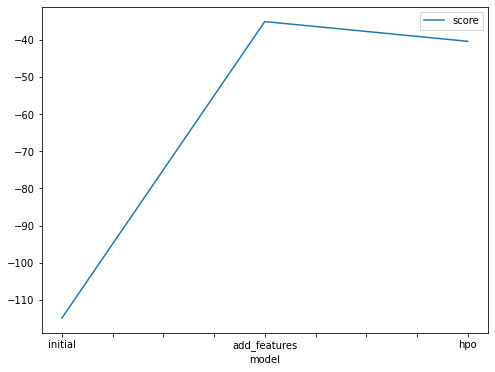

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
import pandas as pd
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score":[predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8,6)).get_figure()
fig.savefig('model_train_score.png')

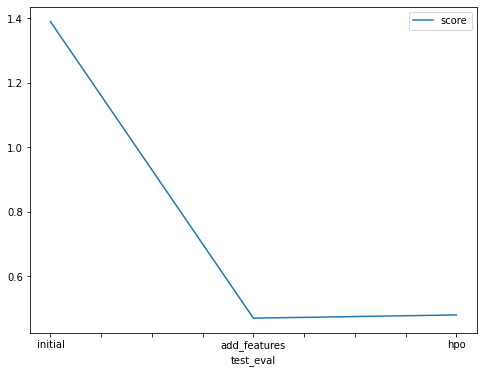

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39, 0.47,0.48 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_trials": ["default", "default", 11],
    "scheduler": ["default", "default", "local"],
    "searcher": ["default", "default", "auto"],
    "time_limit": [600, 600, 600],
    "hyperparameters": ["default", "default", "NN, GBM"],
    "score": [1.39,0.47,0.48]
})

,model,num_trials,scheduler,searcher,time_limit,hyperparameters,score
0,initial,default,default,default,600,default,1.39
1,add_features,default,default,default,600,default,0.47
2,hpo,11,local,auto,600,"NN, GBM",0.48
